# Observable Trends
______
3 observable trends based on data
1. Temperature tends to increase as location latitude approaches 0 degrees. 
2. That observation is true concerning both the southern and northern hemispheres.
3. Humidity may have a weak positive correlation as location latitude approaches 0 degrees. 

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key+"&q="
print(city_url)

city_dict = []
record_count = 0
#north_count = 0
#south_count = 0

print("Beginning Data Retrieval")
print("-----------------------")
for i in cities:
    new_city = city_url + i
    try:
        city_info = requests.get(new_city).json()
        #url functions--pull out relevant data from api response
        lat = city_info['coord']['lat']
        lon = city_info['coord']['lon']
        temp = city_info['main']['temp_max']
        humidity = city_info['main']['humidity']
        clouds = city_info['clouds']['all']
        wind = city_info['wind']['speed']
        country = city_info['sys']['country']
        date = city_info['dt']
        #putting data into dict.
        #key:value pair
        city_dict.append({'city_name':i,
                          'latitude':lat, 
                          'longitude':lon,
                          'temperature': temp,
                          'humidity': humidity,
                          'cloudiness': clouds,
                          'wind_speed': wind,
                          'country': country,
                          'date': date
                         })
        record_count += 1

        print(f"Processing Record: {record_count} | {i}")
        
    except:
        print("Error")
        pass
    

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=045780875ff451bab47e81c9bb008696&q=
Beginning Data Retrieval
-----------------------
Processing Record: 1 | cape town
Processing Record: 2 | dzaoudzi
Processing Record: 3 | pisco
Processing Record: 4 | nikolskoye
Processing Record: 5 | vanimo
Processing Record: 6 | sitka
Processing Record: 7 | qaanaaq
Processing Record: 8 | barkhan
Processing Record: 9 | manavalakurichi
Processing Record: 10 | puerto ayora
Processing Record: 11 | lae
Processing Record: 12 | ushuaia
Processing Record: 13 | pevek
Processing Record: 14 | yellowknife
Processing Record: 15 | launceston
Processing Record: 16 | hithadhoo
Processing Record: 17 | kapaa
Processing Record: 18 | nome
Processing Record: 19 | ribeira grande
Error
Processing Record: 20 | saskylakh
Processing Record: 21 | hermanus
Processing Record: 22 | narsaq
Processing Record: 23 | dikson
Error
Processing Record: 24 | khatanga
Processing Record: 25 | rio grande
Processing Record: 

Processing Record: 234 | vila
Processing Record: 235 | teahupoo
Processing Record: 236 | magadan
Processing Record: 237 | airai
Processing Record: 238 | chirongui
Processing Record: 239 | mokobeng
Processing Record: 240 | san mateo del mar
Processing Record: 241 | rawson
Processing Record: 242 | olafsvik
Processing Record: 243 | port keats
Processing Record: 244 | shizunai
Processing Record: 245 | pafos
Processing Record: 246 | aykhal
Processing Record: 247 | greece
Processing Record: 248 | ratnagiri
Processing Record: 249 | biltine
Processing Record: 250 | lata
Processing Record: 251 | griffith
Processing Record: 252 | port hardy
Processing Record: 253 | dingle
Processing Record: 254 | miyako
Processing Record: 255 | marsa matruh
Processing Record: 256 | orlik
Processing Record: 257 | quebo
Processing Record: 258 | acapulco
Processing Record: 259 | castro
Processing Record: 260 | kavieng
Processing Record: 261 | provideniya
Processing Record: 262 | kununurra
Processing Record: 263 | m

Processing Record: 475 | araouane
Processing Record: 476 | leeton
Processing Record: 477 | tirthahalli
Processing Record: 478 | simao
Processing Record: 479 | zavodoukovsk
Processing Record: 480 | flin flon
Processing Record: 481 | muli
Processing Record: 482 | broome
Processing Record: 483 | doha
Processing Record: 484 | khed
Processing Record: 485 | lucea
Processing Record: 486 | bajil
Processing Record: 487 | certeze
Processing Record: 488 | san policarpo
Processing Record: 489 | sakakah
Processing Record: 490 | dong hoi
Processing Record: 491 | derzhavinsk
Processing Record: 492 | kirakira
Processing Record: 493 | petatlan
Processing Record: 494 | ulaangom
Processing Record: 495 | guatire
Processing Record: 496 | katherine
Processing Record: 497 | mill valley
Processing Record: 498 | kathmandu
Processing Record: 499 | inca
Processing Record: 500 | shediac
Processing Record: 501 | makakilo city
Processing Record: 502 | alofi
Processing Record: 503 | pochutla
Processing Record: 504 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
weather_df = pd.DataFrame(city_dict)
weather_df.head()

,city_name,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,date
0,cape town,-33.93,18.42,64.99,88,0,10.29,ZA,1588726884
1,dzaoudzi,-12.79,45.27,82.40,78,75,12.75,YT,1588727119
2,pisco,-13.70,-76.22,66.20,82,75,12.75,PE,1588727119
3,nikolskoye,59.70,30.79,46.40,65,20,4.47,RU,1588727119
4,vanimo,-2.67,141.30,88.52,62,9,1.63,PG,1588727119


In [56]:
weather_df.to_csv(output_data_file )

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

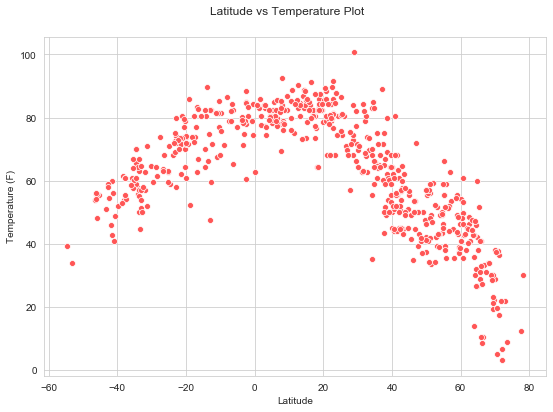

In [57]:
sns.set_style("whitegrid")
latitude = weather_df['latitude']
temperature = weather_df['temperature']

plt.figure(figsize=(9,6))
figure = sns.scatterplot(latitude,temperature, color = '#ff5656' )
plt.subplots_adjust(top=0.91)
plt.suptitle("Latitude vs Temperature Plot")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')

plt.savefig("./Images/lat_vs_temp.png")


A visual representation of the relationship between the latitudes of a list of random cities and their maximum temperatures on Sunday May 5, 2020.


#### Latitude vs. Humidity Plot

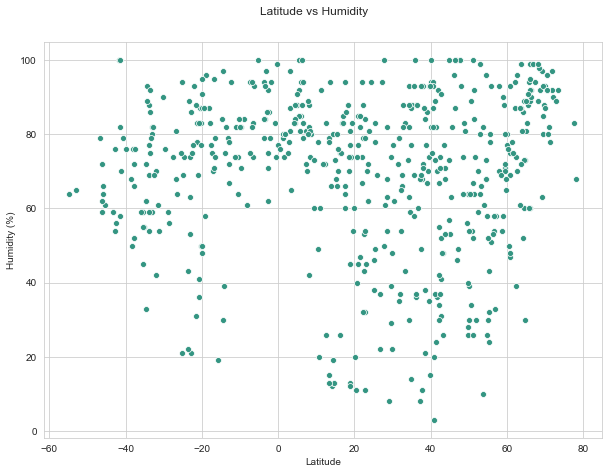

In [58]:
sns.set_style("whitegrid")
latitude = weather_df['latitude']
humidity = weather_df['humidity']

figure = plt.figure(figsize=(10,7))
ax = sns.scatterplot(latitude,humidity, color = '#349582' )
plt.subplots_adjust(top=0.91)
plt.suptitle("Latitude vs Humidity")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.show()
figure.savefig("./Images/lat_vs_humidity.png")

A visual representation of the relationship between the latitudes of a list of random cities and their humidities on Sunday May 3, 2020.



#### Latitude vs. Cloudiness Plot

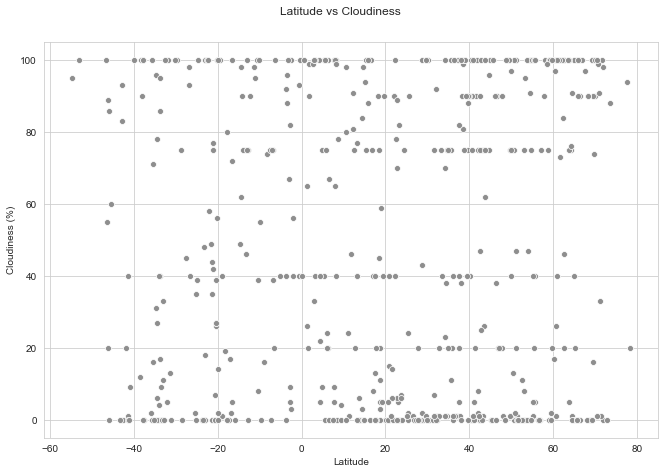

In [59]:
sns.set_style("whitegrid")
latitude = weather_df['latitude']
cloudiness = weather_df['cloudiness']

figure = plt.figure(figsize=(11,7))
ax = sns.scatterplot(latitude,cloudiness, color = '#8e8e8e' )
plt.subplots_adjust(top=0.91)
plt.suptitle("Latitude vs Cloudiness")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.show()
figure.savefig("./Images/lat_vs_cloudiness.png")

A visual representation of the relationship between the latitudes of a list of random cities and their cloud cover on Sunday May 3, 2020.



#### Latitude vs. Wind Speed Plot

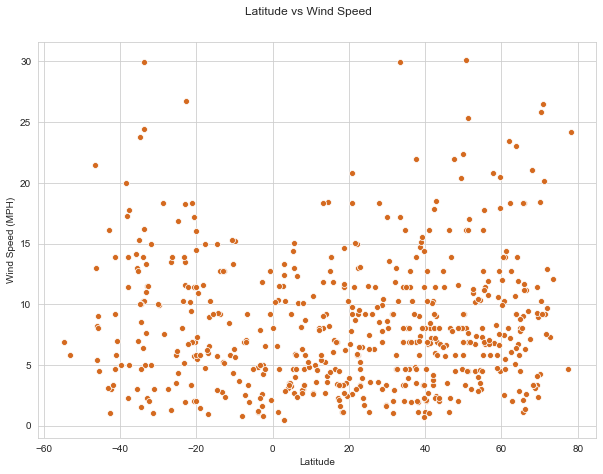

In [60]:
sns.set_style("whitegrid")
latitude = weather_df['latitude']
wind_speed = weather_df['wind_speed']

figure = plt.figure(figsize=(10,7))
sns.scatterplot(latitude,wind_speed, color = '#d46a20' )
plt.subplots_adjust(top=0.91)
plt.suptitle("Latitude vs Wind Speed")
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.show()
figure.savefig("./Images/lat_vs_wind_speed.png")

A visual representation of the relationship between the latitudes of a list of random cities and their wind speed on Sunday May 3, 2020.


## Linear Regression

In [72]:
# OPTIONAL: Create a function to create Linear Regression plots
#x_values = weather_df['lat']
#y_values = weather_df['temperature']

def plot_regress(x_values, y_values, y_label, color, title, file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    figure = plt.figure(figsize=(10,7))
    plt.scatter(x_values,y_values, color={color})
    plt.plot(x_values,regress_values,"darkmagenta")
    plt.suptitle(title)
    plt.annotate(line_eq,(6,10),fontsize=17,color="darkmagenta")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    figure.savefig(f"./Images/{file_name}.png")

In [73]:
# OPTIONAL: Create a function to create Linear Regression plots
#x_values = weather_df['lat']
#y_values = weather_df['temperature']

def plot_regress_south(x_values, y_values, y_label, color, title, file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    figure = plt.figure(figsize=(10,7))
    plt.scatter(x_values,y_values, color={color})
    plt.plot(x_values,regress_values,"darkmagenta")
    plt.suptitle(title)
    plt.annotate(line_eq,(-15,45),fontsize=20,color="darkmagenta")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    figure.savefig(f"./Images/{file_name}.png")

In [74]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df['latitude'] >0]
southern_df = weather_df[weather_df['latitude'] <0]
northern_df.count()
southern_df.count()

city_name      164
latitude       164
longitude      164
temperature    164
humidity       164
cloudiness     164
wind_speed     164
country        164
date           164
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

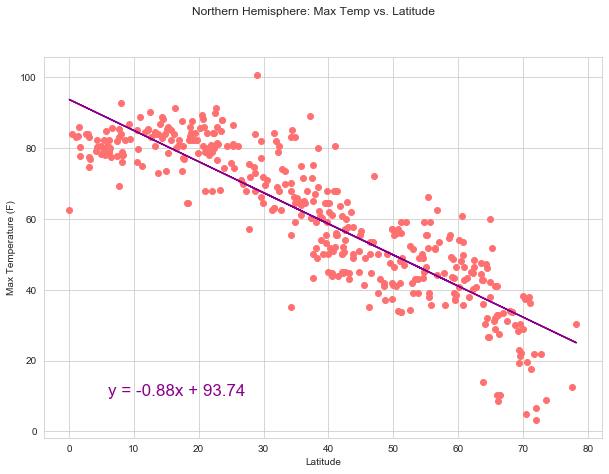

In [75]:
x_values = northern_df['latitude']
y_values = northern_df['temperature']

plot_regress(x_values,y_values,"Max Temperature (F)",'#ff7070',"Northern Hemisphere: Max Temp vs. Latitude", 'north_lat_vs_temp')


A visual representation of the relationship between the __northern latitudes__ of a list of random cities and their maximum temperatures on Sunday May 3, 2020 (with regression line and line equation).

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

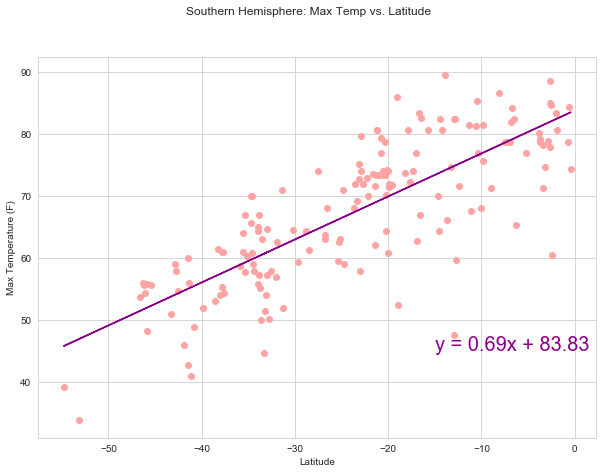

In [76]:
x_values = southern_df['latitude']
y_values = southern_df['temperature']

plot_regress_south(x_values,y_values,"Max Temperature (F)",'#ffa3a3',"Southern Hemisphere: Max Temp vs. Latitude", 'south_lat_vs_temp')

A visual representation of the relationship between the __southern latitudes__ of a list of random cities and their maximum temperatures on Sunday May 3, 2020 (with regression line and line equation).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

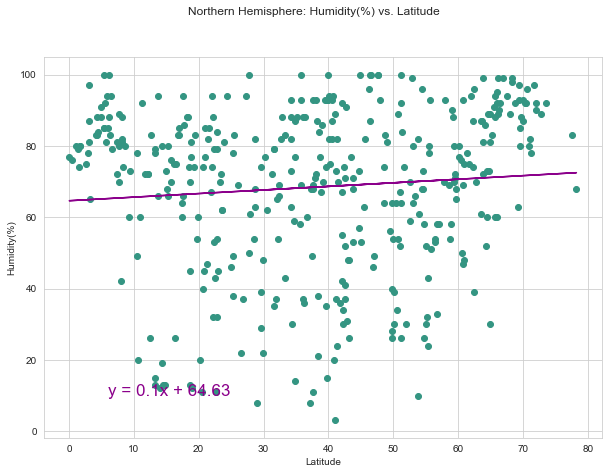

In [77]:
x_values = northern_df['latitude']
y_values = northern_df['humidity']

plot_regress(x_values,y_values,"Humidity(%)",'#349582',"Northern Hemisphere: Humidity(%) vs. Latitude", 'north_lat_vs_humidity')

A visual representation of the relationship between the __northern latitudes__ of a list of random cities and their humidities on Sunday May 3, 2020 (with regression line and line equation).

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

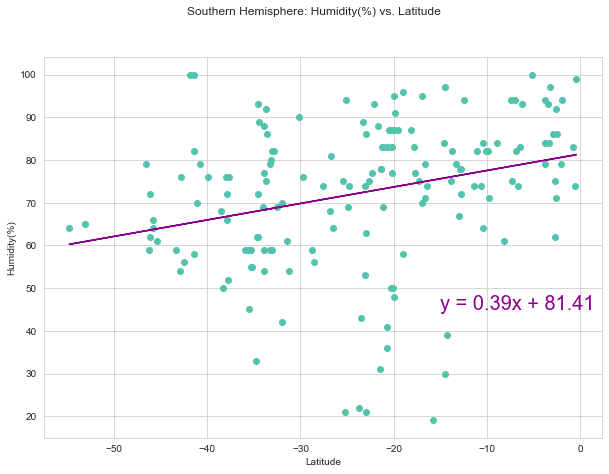

In [78]:
x_values = southern_df['latitude']
y_values = southern_df['humidity']

plot_regress_south(x_values,y_values,"Humidity(%)",'#53c3ad',"Southern Hemisphere: Humidity(%) vs. Latitude", 'south_lat_vs_humidity')

A visual representation of the relationship between the __southern latitudes__ of a list of random cities and their humidities on Sunday May 3, 2020 (with regression line and line equation).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

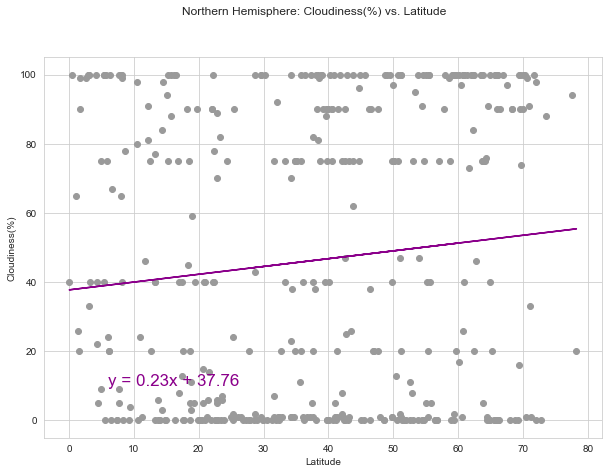

In [79]:
x_values = northern_df['latitude']
y_values = northern_df['cloudiness']

plot_regress(x_values,y_values,"Cloudiness(%)",'#9a9a9a',"Northern Hemisphere: Cloudiness(%) vs. Latitude",'north_lat_vs_cloudiness')

A visual representation of the relationship between the __northern latitudes__ of a list of random cities and their cloud cover on Sunday May 3, 2020 (with regression line and line equation).

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

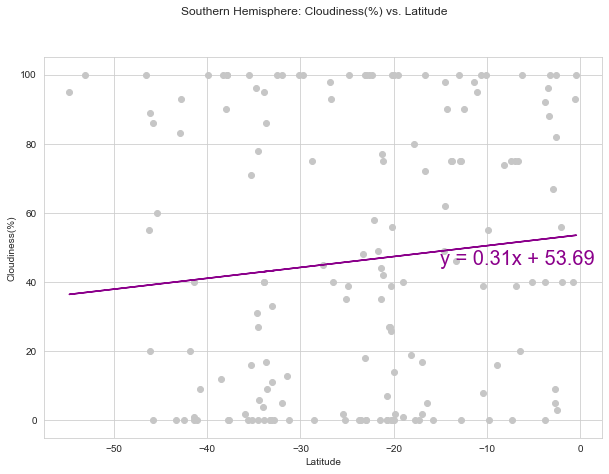

In [80]:
x_values = southern_df['latitude']
y_values = southern_df['cloudiness']

plot_regress_south(x_values,y_values,"Cloudiness(%)",'#c6c6c6',"Southern Hemisphere: Cloudiness(%) vs. Latitude",'south_lat_vs_cloudiness')

A visual representation of the relationship between the __southern latitudes__ of a list of random cities and their cloud cover on Sunday May 3, 2020 (with regression line and line equation).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

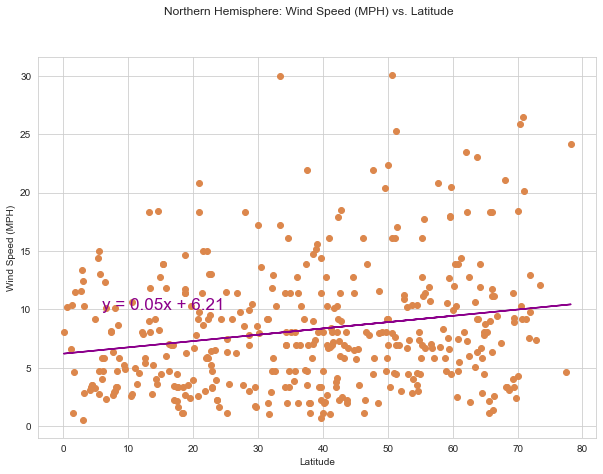

In [81]:
x_values = northern_df['latitude']
y_values = northern_df['wind_speed']

plot_regress(x_values,y_values,"Wind Speed (MPH)",'#dc874c',"Northern Hemisphere: Wind Speed (MPH) vs. Latitude", 'north_lat_vs_windspeed')

A visual representation of the relationship between the __northern latitudes__ of a list of random cities and their wind speed on Sunday May 3, 2020 (with regression line and line equation).

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

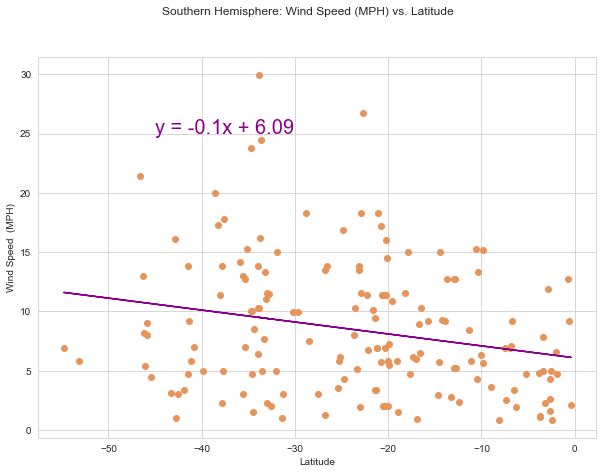

In [82]:
x_values = southern_df['latitude']
y_values = southern_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
figure = plt.figure(figsize=(10,7))
plt.scatter(x_values,y_values, color="#e6945a")
plt.plot(x_values,regress_values,"darkmagenta")
plt.suptitle("Southern Hemisphere: Wind Speed (MPH) vs. Latitude")
plt.annotate(line_eq,(-45,25),fontsize=20,color="darkmagenta")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed  (MPH)")
plt.show()
figure.savefig('./Images/south_lat_vs_windspeed')

A visual representation of the relationship between the __southern latitudes__ of a list of random cities and their wind speed on Sunday May 3, 2020 (with regression line and line equation).